<a href="https://colab.research.google.com/github/maksmanikowski/neural_networks/blob/main/dl04_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl03_training_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Exercise 4

Build churn prediction model usin data from:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/

copy of data avialable: data/churn.csv


In [105]:
import pandas as pd

In [106]:
df = pd.read_csv("data.csv")

In [107]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [109]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [110]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [111]:
X.iloc[:3]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [112]:
X.drop("customerID", axis=1, inplace=True)

In [113]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [114]:
X["TotalCharges"] = pd.to_numeric(X["TotalCharges"], errors="coerce")

In [115]:
X["TotalCharges"].isnull().sum()

11

In [116]:
nans = X[X["TotalCharges"].isnull()].index.tolist()
nans

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [117]:
y.drop(nans, axis=0, inplace=True)
X.dropna(inplace=True)

In [118]:
X = pd.get_dummies(X)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [119]:
y = y.map({'Yes': 1, 'No': 0})
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [120]:
X.shape

(7032, 45)

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [123]:
y_test.value_counts()

0    1049
1     358
Name: Churn, dtype: int64

In [124]:
y_train.value_counts()

0    3717
1    1345
Name: Churn, dtype: int64

In [125]:
X_train.shape

(5062, 45)

In [128]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, input_shape=(45,), activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

opt = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[tf.keras.metrics.AUC(name='auc')])

In [129]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights= True)

In [130]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
40/40 [==============================] - 1s 6ms/step - loss: 0.9146 - auc: 0.5421 - val_loss: 0.6389 - val_auc: 0.6463
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5739 - auc: 0.6865 - val_loss: 0.5268 - val_auc: 0.7603
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5004 - auc: 0.7593 - val_loss: 0.4977 - val_auc: 0.7942
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4780 - auc: 0.7852 - val_loss: 0.4809 - val_auc: 0.8123
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4633 - auc: 0.8017 - val_loss: 0.4702 - val_auc: 0.8223
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4567 - auc: 0.8084 - val_loss: 0.4604 - val_auc: 0.8290
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4520 - auc: 0.8122 - val_loss: 0.4546 - val_auc: 0.8329
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.4461 - auc: 0.81

In [131]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 45)                0         
                                                                 
 dense_21 (Dense)            (None, 30)                1380      
                                                                 
 dropout_13 (Dropout)        (None, 30)                0         
                                                                 
 dense_22 (Dense)            (None, 30)                930       
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


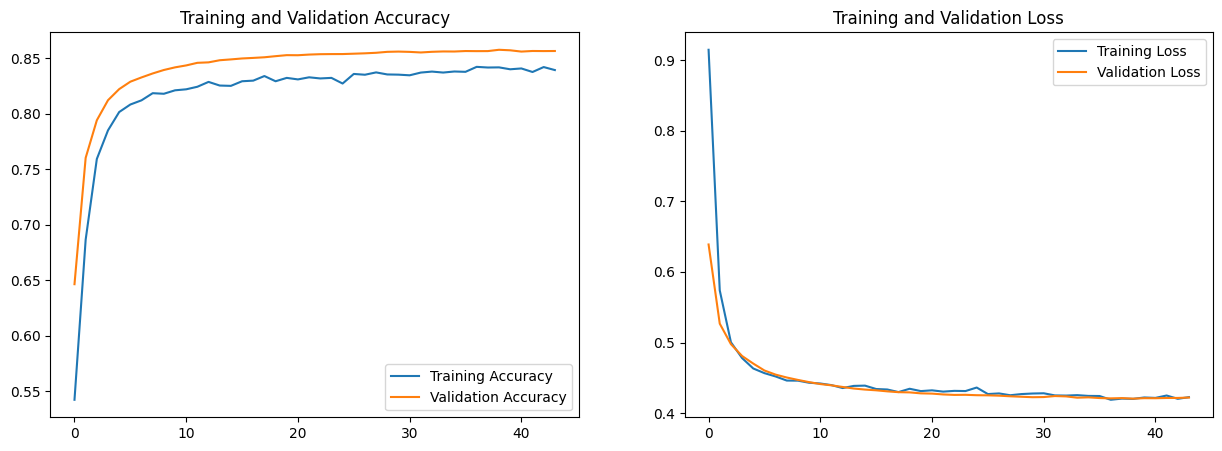

In [133]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(history.history['auc'], label='Training Accuracy')
ax[0].plot(history.history['val_auc'], label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_title('Training and Validation Accuracy')
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_title('Training and Validation Loss')
plt.show()

- Why loss is higher in training data?

Because it's calculated for the whole epoch (so at the beginning the weights weren't even updated much) and after that comes the validation check. Also the `Dropout()` layers purposefully introduce bias to the learning process to achieve better generalization - [Geron explains](https://twitter.com/aureliengeron/status/1110839223878184960). To see the better visualization of both values we can shift the train_loss 1/2 epoch to the left and train the model without `Dropout()` layers.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, input_shape=(45,), activation="relu"),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

opt = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[tf.keras.metrics.AUC(name='auc')])

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping]
)

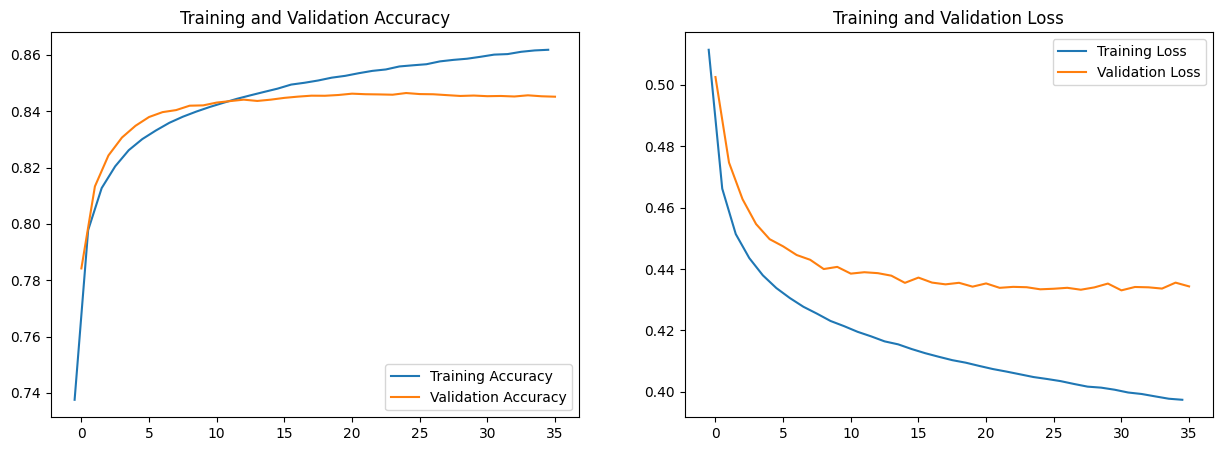

In [136]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot([e - 0.5 for e in history.epoch], history.history['auc'], label='Training Accuracy')
ax[0].plot(history.history['val_auc'], label='Validation Accuracy')
ax[0].legend(loc='lower right')
ax[0].set_title('Training and Validation Accuracy')
ax[1].plot([e - 0.5 for e in history.epoch], history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend(loc='upper right')
ax[1].set_title('Training and Validation Loss')
plt.show()

[Comparison to XGBoost](https://www.kaggle.com/code/snanilim/churn-deep-learning-vs-xgboost#Artificial-Neural-Network)